<a href="https://colab.research.google.com/github/GabrielMedeiros32/Bootcamp_Data_Science/blob/main/notebooks/trabalho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Organização**

Importação das bibliotecas e dos dados limpos

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import seaborn as sns
from matplotlib.lines import Line2D
from google.colab import files

In [16]:
dados_trans = pd.read_csv('https://raw.githubusercontent.com/GabrielMedeiros32/Case_Otimizacao/main/dados/trans.csv')
dados_trans = dados_trans.drop('Unnamed: 0',axis=1)
dados_trans.head(3)

,TRANSPORTADOR,FROTA_MIN,FROTA_MAX,Gruas,%
0,Pastori,25,27,2,0.4
1,Tover,12,14,2,0.4
2,Rampazo,19,21,2,0.4


In [17]:
dados_demand = pd.read_csv('https://raw.githubusercontent.com/GabrielMedeiros32/Case_Otimizacao/main/dados/demanda.csv', index_col='DIA')
dados_demand = dados_demand.drop('Unnamed: 0',axis=1)
dados_demand.head(3)

,DEMANDA_MIN,DEMANDA_MAX,RSP_MIN,RSP_MAX,Ciclo Lento
DIA,,,,,
1,6400,8000,1.4,1.49,X
2,6400,8000,1.4,1.49,NaN
3,6400,8000,1.4,1.49,NaN


In [18]:
dados_rotas = pd.read_csv('https://raw.githubusercontent.com/GabrielMedeiros32/Case_Otimizacao/main/dados/rotas.csv')
dados_rotas = dados_rotas.drop('Unnamed: 0',axis=1)
dados_rotas = dados_rotas.set_index('ORIGEM')
v_max = [21,21,21,21,21,27,27,27,27,27,21,21,21,21,27,27,27,27,21,21,21,21,21,27,27,27,27,27,14,14,14,14,14,14,14,14,14,14,14,14]
dados_rotas['v_max'] = v_max
dados_rotas['trans_max'] = 66*dados_rotas['TEMPO_CICLO']*dados_rotas['v_max']
dados_rotas2 = dados_rotas.copy()
dados_rotas = dados_rotas.reset_index().drop_duplicates(subset='ORIGEM', keep='first').set_index('ORIGEM')
dados_rotas.head()


,TRANSPORTADOR,CAIXA_CARGA,TEMPO_CICLO,CICLO_LENTO,Fazenda,v_max,trans_max
ORIGEM,,,,,,,
S3AX01,Rampazo,66,1.8,0,INDIANA II,21,2494.8
S3AX02,Rampazo,66,1.8,0,INDIANA II,21,2494.8
S3AX03,Rampazo,66,1.8,0,INDIANA II,21,2494.8
S3AX04,Rampazo,66,1.8,0,INDIANA II,21,2494.8
S3AX06,Rampazo,66,1.8,0,INDIANA II,21,2494.8


In [19]:
dados_rotas2 = dados_rotas2.reset_index().drop_duplicates(subset='ORIGEM', keep='last').set_index('ORIGEM')
dados_rotas2.head()

,TRANSPORTADOR,CAIXA_CARGA,TEMPO_CICLO,CICLO_LENTO,Fazenda,v_max,trans_max
ORIGEM,,,,,,,
S3AX01,Pastori,66,1.8,0,INDIANA II,27,3207.6
S3AX02,Pastori,66,1.8,0,INDIANA II,27,3207.6
S3AX03,Pastori,66,1.8,0,INDIANA II,27,3207.6
S3AX04,Pastori,66,1.8,0,INDIANA II,27,3207.6
S3AX06,Pastori,66,1.8,0,INDIANA II,27,3207.6


In [20]:
dados_BD_UP = pd.read_csv('https://raw.githubusercontent.com/GabrielMedeiros32/Case_Otimizacao/main/dados/BD_UP.csv')
dados_BD_UP = dados_BD_UP.sort_values('FAZENDA')
dados_BD_UP = dados_BD_UP.set_index('UP')
dados_BD_UP2 = dados_BD_UP.copy()
dados_BD_UP['Proporção'] = dados_BD_UP['VOLUME'] / dados_rotas['trans_max']
dados_BD_UP['Proporção'] = dados_BD_UP['Proporção'].apply(np.ceil)
dados_BD_UP['trans_max'] = dados_rotas['trans_max']
dados_BD_UP['Proporção V'] = dados_BD_UP['VOLUME'] / dados_BD_UP['Proporção']
dados_BD_UP

,FAZENDA,DB,VOLUME,RSP,Proporção,trans_max,Proporção V
UP,,,,,,,
S6C334,FORTALEZA,458.550818,5974.00,1.505206,4.0,1940.4,1493.500000
S6C298,FORTALEZA,475.592290,3700.00,1.622175,2.0,1940.4,1850.000000
S6C297,FORTALEZA,408.376272,4791.00,1.367399,3.0,1940.4,1597.000000
S6C335,FORTALEZA,462.157496,8405.00,1.519874,5.0,1940.4,1681.000000
S3AX04,INDIANA II,471.026798,1300.00,1.511823,1.0,2494.8,1300.000000
S3AX06,INDIANA II,473.890188,5568.94,1.550207,3.0,2494.8,1856.313333
S3AX02,INDIANA II,475.082497,3816.49,1.540128,2.0,2494.8,1908.245000
S3AX01,INDIANA II,476.359312,11874.50,1.546497,5.0,2494.8,2374.900000
S3AX03,INDIANA II,410.081889,2124.07,1.302226,1.0,2494.8,2124.070000


In [21]:
dados_BD_UP2['Proporção'] = dados_BD_UP2['VOLUME'] / dados_rotas2['trans_max']
dados_BD_UP2['Proporção'] = dados_BD_UP2['Proporção'].apply(np.ceil)
dados_BD_UP2['trans_max'] = dados_rotas2['trans_max']
dados_BD_UP2['Proporção V'] = dados_BD_UP2['VOLUME'] / dados_BD_UP2['Proporção']
dados_BD_UP2

,FAZENDA,DB,VOLUME,RSP,Proporção,trans_max,Proporção V
UP,,,,,,,
S6C334,FORTALEZA,458.550818,5974.00,1.505206,4.0,1940.4,1493.500000
S6C298,FORTALEZA,475.592290,3700.00,1.622175,2.0,1940.4,1850.000000
S6C297,FORTALEZA,408.376272,4791.00,1.367399,3.0,1940.4,1597.000000
S6C335,FORTALEZA,462.157496,8405.00,1.519874,5.0,1940.4,1681.000000
S3AX04,INDIANA II,471.026798,1300.00,1.511823,1.0,3207.6,1300.000000
S3AX06,INDIANA II,473.890188,5568.94,1.550207,2.0,3207.6,2784.470000
S3AX02,INDIANA II,475.082497,3816.49,1.540128,2.0,3207.6,1908.245000
S3AX01,INDIANA II,476.359312,11874.50,1.546497,4.0,3207.6,2968.625000
S3AX03,INDIANA II,410.081889,2124.07,1.302226,1.0,3207.6,2124.070000


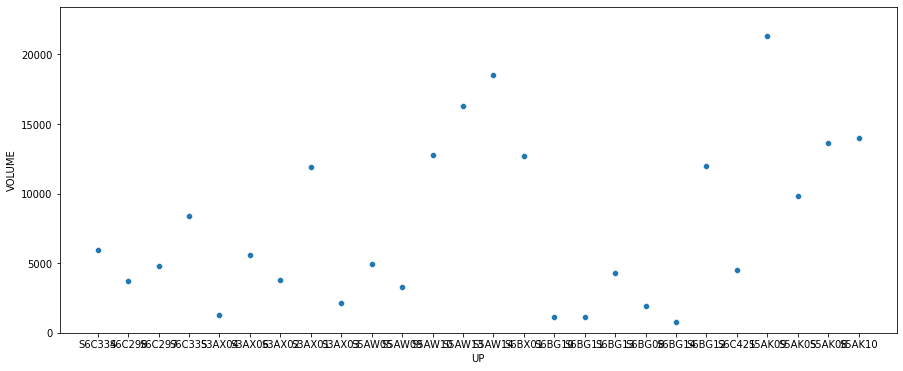

In [22]:
fig, ax = plt.subplots(figsize=(15,6))
sns.scatterplot(data = dados_BD_UP['VOLUME'])
ax.set_ylim(0,dados_BD_UP['VOLUME'].max()*1.1)

plt.show()

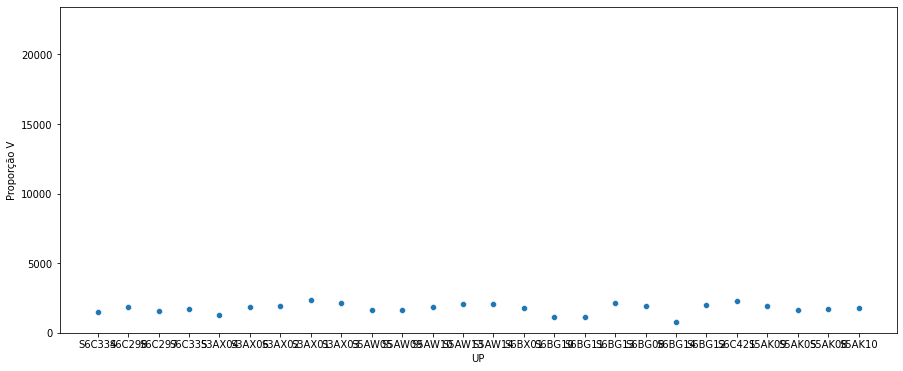

In [23]:
fig, ax = plt.subplots(figsize=(15,6))
sns.scatterplot(data = dados_BD_UP['Proporção V'])
ax.set_ylim(0,dados_BD_UP['VOLUME'].max()*1.1)

plt.show()

Vou então exportar novamente meus dados:

In [24]:
dados_BD_UP.to_excel('BD_UP.xlsx')
#files.download('BD_UP.xlsx')

In [25]:
dados_BD_UP2.to_excel('BD_UP2.xlsx')
#files.download('BD_UP2.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>